# Mushroom Classifier

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('mushroom.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.shape

(8124, 23)

As we can see that we have 8124 rows and 23 columns in this dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

As we can we have object type in all the columns, which will treated during encoding.

In [8]:
pd.set_option('display.max_rows',None)

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see there are no null values in this dataset. 

In [10]:
df['class'].unique()

array(['p', 'e'], dtype=object)

We have two unique target variable in this dataset i.e p=poisonous and e=edible.

# Preprocessing

In [11]:
LE=LabelEncoder()
for column in range(len(df.columns)):
    df[df.columns[column]]=LE.fit_transform(df[df.columns[column]])

In [39]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


We have successfully convert object datatypes into numerical datatypes. Also, the column 'veil-type' doesnt consist any values excep 0, hence removing it as it doesnt contribute much to this dataset.

In [13]:
df.drop('veil-type',axis=1,inplace=True)

In [14]:
df.shape

(8124, 22)

In [15]:
y=df['class']
x=df.drop('class',axis=1)

We have seperated the Features and Target variables

In [16]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [17]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


We have successfully scaled the feature columns using StandardScarler

In [18]:
np.sum(y)/len(y)*100

48.20285573609059

There is no sign of data imbalance.

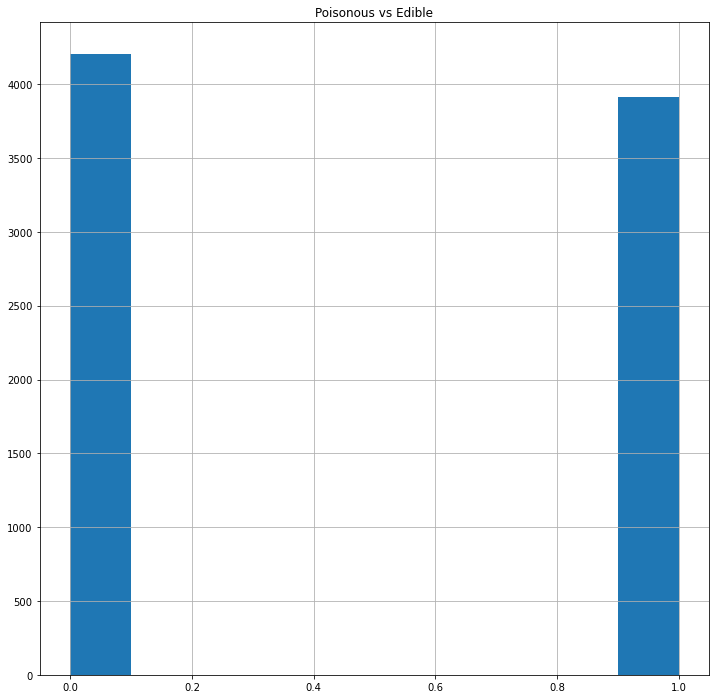

In [19]:
plt.figure(figsize=[12,12])
df['class'].hist(grid=True)
plt.title("Poisonous vs Edible")
plt.show()

In [20]:
corr_mat = df.corr()
corr_mat.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095


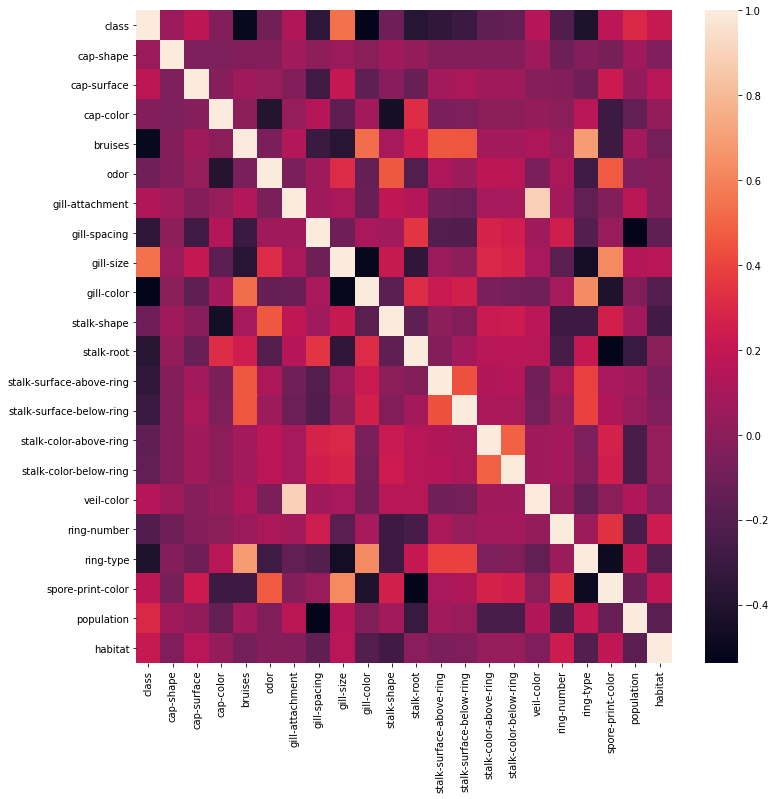

In [21]:
plt.figure(figsize=[12,12])
sns.heatmap(corr_mat)
plt.show()

# Finding The Best Random State

In [40]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy score is ',maxAccu,'on Random State',maxRS)

Best accuracy score is  0.9675963904840033 on Random State 172


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state = 172)

# Finding the Best Model

In [42]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9675963904840033
[[1212   39]
 [  40 1147]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1251
           1       0.97      0.97      0.97      1187

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [43]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[1251    0]
 [   0 1187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       1.00      1.00      1.00      1187

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [44]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1251    0]
 [   0 1187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       1.00      1.00      1.00      1187

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [45]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[1251    0]
 [   0 1187]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       1.00      1.00      1.00      1187

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [46]:
scr=cross_val_score(LR,x,y,cv=5)
print('Cross Validation score of LogisticRegression Model is :',scr.mean())

Cross Validation score of LogisticRegression Model is : 0.8301065555134521


In [47]:
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score for DecisionTreeClassifier model is :',scr.mean())

cross validation score for DecisionTreeClassifier model is : 0.9271039029935582


In [48]:
scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score for RandomForestClassifier model is :',scr.mean())

cross validation score for RandomForestClassifier model is : 0.8960785145888595


In [49]:
scr=cross_val_score(svc,x,y,cv=5)
print('cross validation score for SupportVectorMachine mode is :',scr.mean())

cross validation score for SupportVectorMachine mode is : 0.8702213717317167


Minimum difference in accuracy and cross validation score is Decision Tree Classifier, so this is our best model.

# Hyper Parameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameter = {'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [34]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [50]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [51]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [52]:
mod=DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=172)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

100.0


# Saving the Model

In [53]:
import joblib
joblib.dump(mod,'MushroomClassifierFinal1.pkl')

['MushroomClassifierFinal1.pkl']